INITIAL EDA 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
import re
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('train.csv')

In [3]:

# df = df.sample(200000,random_state=2)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df = df.dropna()


In [10]:
df.duplicated().sum()

0

In [11]:
print(df['is_duplicate'].value_counts())


is_duplicate
0    255024
1    149263
Name: count, dtype: int64


    HANDLING IMBALANCE

In [12]:
df_0 = df[df['is_duplicate'] == 0]
df_1 = df[df['is_duplicate'] == 1]


In [13]:
df_0_sampled = df_0.sample(
    n=len(df_1),
    random_state=42
)


In [14]:
df_balanced = pd.concat([df_0_sampled, df_1])


In [15]:
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [16]:
df['is_duplicate'].value_counts()


is_duplicate
1    149263
0    149263
Name: count, dtype: int64

In [17]:
df.shape

(298526, 6)

In [18]:
# repeated questions from q1 and q2 combined 


qid = pd.Series(df['qid1'].tolist()+ df['qid2'].tolist())
print("Number of unique questions", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated ',x[x].shape[0])

Number of unique questions 391054
Number of questions getting repeated  79143


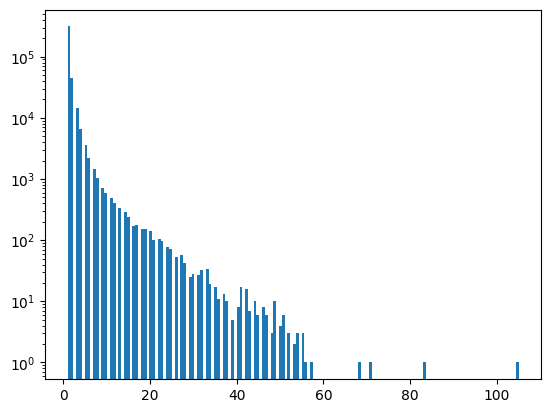

In [19]:
# histogram for repeated questions 

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

        PREPROCESSING QUESTIONS 

In [20]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [21]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

    FEATURE ENGINEERING 

In [22]:
# 1) char length of q1
# 2) char length of q2
# 3) No. of words in q1
# 4) No. of words in q2
# 5) No. of common unique words
# 6) Total No. of words from both 
# 7) word common / word total 

In [23]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84


In [25]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17


In [26]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)


In [27]:
df['word_common'] = df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,4
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,4
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,3
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,14
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,7


In [28]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [29]:
df['word_total'] = df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,4,20
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,4,22
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,3,22
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,14,31
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,7,30


In [30]:
df['word_share']=round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,4,20,0.20
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,4,22,0.18
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,3,22,0.14
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,14,31,0.45
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,7,30,0.23


In [31]:
df.shape

(298526, 13)

    EDA ON FEATURES 

minimum characters :  0
maximum characters :  621
Average num of characters 57


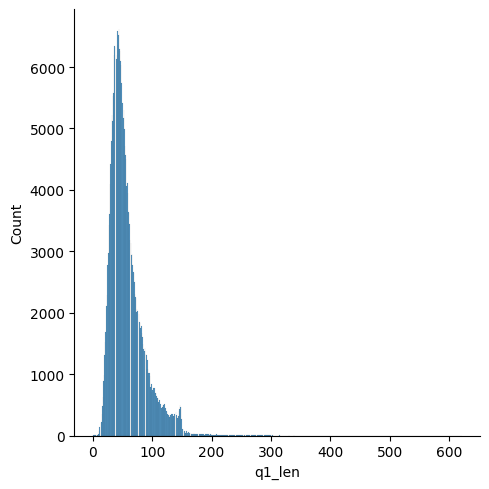

In [32]:
sns.displot(df['q1_len'])
print('minimum characters : ',df['q1_len'].min())
print('maximum characters : ',df['q1_len'].max())
print('Average num of characters',int(df['q1_len'].mean()))

minimum characters :  0
maximum characters :  1170
Average num of characters 57


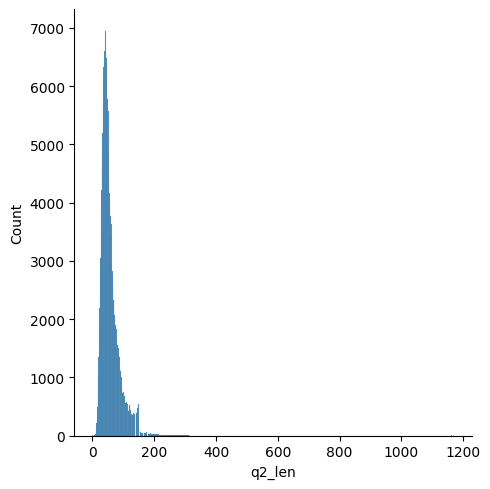

In [33]:
sns.displot(df['q2_len'])
print('minimum characters : ',df['q2_len'].min())
print('maximum characters : ',df['q2_len'].max())
print('Average num of characters',int(df['q2_len'].mean()))

minimum words :  1
maximum words :  147
Average num of words 11


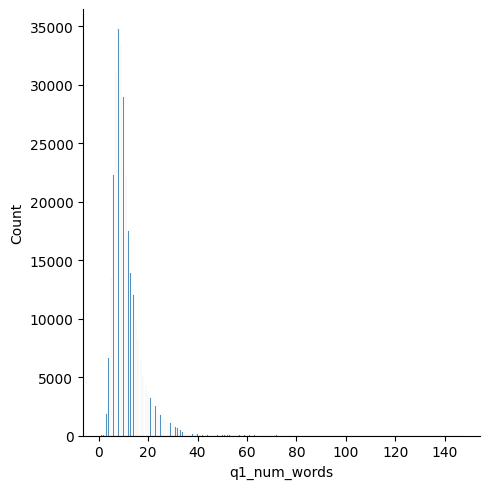

In [34]:
sns.displot(df['q1_num_words'])
print('minimum words : ',df['q1_num_words'].min())
print('maximum words : ',df['q1_num_words'].max())
print('Average num of words',int(df['q1_num_words'].mean()))

minimum words :  1
maximum words :  270
Average num of words 11


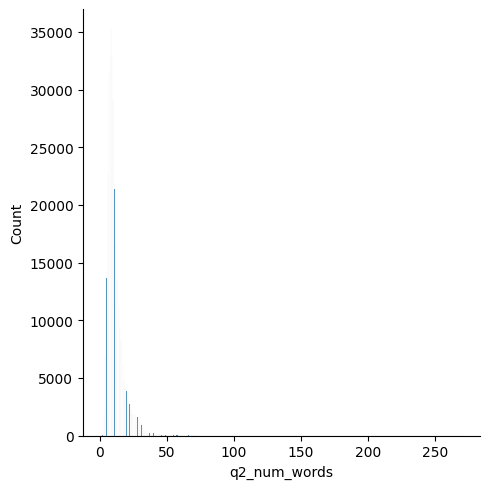

In [35]:
sns.displot(df['q2_num_words'])
print('minimum words : ',df['q2_num_words'].min())
print('maximum words : ',df['q2_num_words'].max())
print('Average num of words',int(df['q2_num_words'].mean()))

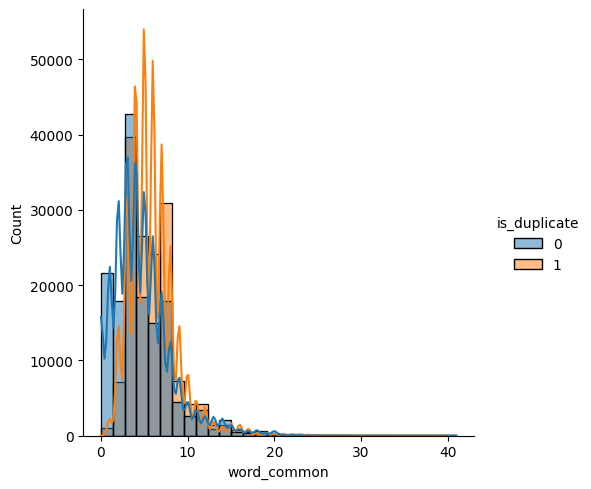

In [36]:
# common words 

sns.displot(
    data=df,
    x='word_common',
    hue='is_duplicate',
    kde=True,
    bins=30
)
plt.show()


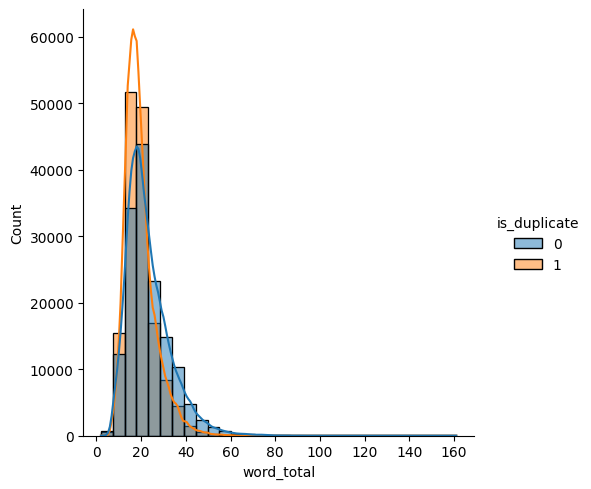

In [37]:
# total words 

sns.displot(
    data=df,
    x='word_total',
    hue='is_duplicate',
    kde=True,
    bins=30
)
plt.show()

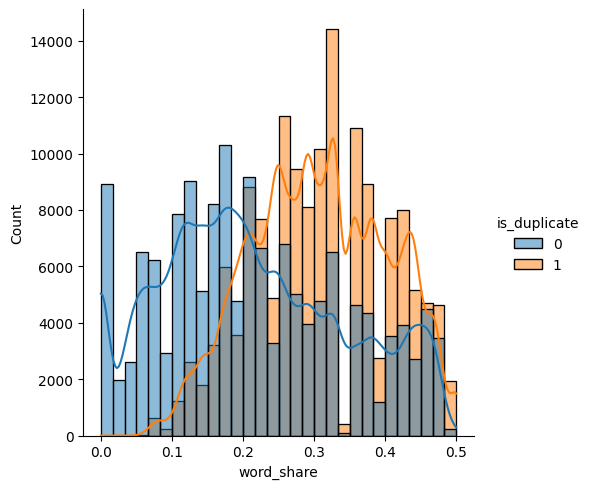

In [38]:
#  word share 

sns.displot(
    data=df,
    x='word_share',
    hue='is_duplicate',
    kde=True,
    bins=30
)
plt.show()

    ADVANCED FEATURE ENGINNERING

In [39]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [42]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,...,20,0.20,0.249994,0.199996,0.599988,0.599988,0.444440,0.399996,0.0,0.0
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,...,22,0.18,0.499988,0.399992,0.399992,0.249997,0.444440,0.307690,0.0,0.0
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,...,22,0.14,0.249994,0.142855,0.399992,0.333328,0.299997,0.214284,0.0,1.0
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,...,31,0.45,0.874989,0.777769,0.999986,0.999986,0.933327,0.874995,0.0,1.0
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,...,30,0.23,0.833319,0.499995,0.333328,0.285710,0.538457,0.437497,0.0,0.0


In [43]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    
    return length_features

In [44]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [45]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,...,0.199996,0.599988,0.599988,0.444440,0.399996,0.0,0.0,1.0,9.5,0.230769
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,...,0.399992,0.399992,0.249997,0.444440,0.307690,0.0,0.0,4.0,11.0,0.208333
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,...,0.142855,0.399992,0.333328,0.299997,0.214284,0.0,1.0,4.0,12.0,0.239130
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,...,0.777769,0.999986,0.999986,0.933327,0.874995,0.0,1.0,1.0,15.5,0.916667
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,...,0.499995,0.333328,0.285710,0.538457,0.437497,0.0,0.0,3.0,14.5,0.323529


In [46]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

c:\Users\Krisha\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [48]:
print(df.shape)
df.head()

(298526, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,364720,494790,484904,why does god hate gays if he made them,if god hates homosexuality why did he make it...,1,38,55,9,11,...,0.399996,0.0,0.0,1.0,9.5,0.230769,47,43,57,57
1,221233,328525,328526,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina,1,59,47,13,9,...,0.307690,0.0,0.0,4.0,11.0,0.208333,60,66,64,64
2,121761,197246,197247,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars,0,92,45,14,10,...,0.214284,0.0,1.0,4.0,12.0,0.239130,44,53,38,51
3,249661,363349,195254,what are some things new employees should know...,what are some things new employees should know...,0,89,83,16,15,...,0.874995,0.0,1.0,1.0,15.5,0.916667,91,94,88,96
4,212447,9163,46561,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...,1,67,84,13,17,...,0.437497,0.0,0.0,3.0,14.5,0.323529,60,67,73,77


In [49]:
# sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [50]:
# sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

In [51]:
# sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [52]:
# sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [53]:
# sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [54]:
# # Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

# from sklearn.preprocessing import MinMaxScaler

# X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
# y = df['is_duplicate'].values

In [55]:
# from sklearn.manifold import TSNE

# tsne2d = TSNE(
#     n_components=2,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     max_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [56]:
# x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# # draw the plot in appropriate place in the grid
# sns.lmplot(
#     data=x_df,
#     x='x',
#     y='y',
#     hue='label',
#     fit_reg=False,
#     height=8,
#     palette="Set1",
#     markers=['s','o']
# )


In [57]:
# tsne3d = TSNE(
#     n_components=3,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     max_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [58]:
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

    FINAL DATAFRAME

In [59]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
0,why does god hate gays if he made them,if god hates homosexuality why did he make it...
1,what happens to a photon after it hits the ret...,where does a photon go after hitting our retina
2,what are some legitimate explanations for the ...,what is the history of the ewoks in star wars
3,what are some things new employees should know...,what are some things new employees should know...
4,what are some of the best coaching institutes ...,which coaching institute is best for gmat in d...


In [60]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()
for_wtv_df = final_df

(298526, 23)


    VECTORIZATION AND MODEL

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q_mat = cv.fit_transform(questions)
q1_mat = q_mat[:len(ques_df)]
q2_mat = q_mat[len(ques_df):]

In [62]:
from joblib import dump
dump(cv,'count_vectorizer1.joblib')

['count_vectorizer1.joblib']

In [63]:
temp_df1 = pd.DataFrame.sparse.from_spmatrix(q1_mat, index=ques_df.index)
temp_df2 = pd.DataFrame.sparse.from_spmatrix(q2_mat, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(298526, 6000)

In [64]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(298526, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,38,55,9,11,4,20,0.20,0.249994,0.199996,...,0,0,0,0,0,0,0,0,0,0
1,1,59,47,13,9,4,22,0.18,0.499988,0.399992,...,0,0,0,0,0,0,0,0,0,0
2,0,92,45,14,10,3,22,0.14,0.249994,0.142855,...,0,0,0,0,0,0,0,0,0,0
3,0,89,83,16,15,14,31,0.45,0.874989,0.777769,...,0,0,0,0,0,0,0,0,0,0
4,1,67,84,13,17,7,30,0.23,0.833319,0.499995,...,0,0,0,0,0,0,0,0,0,0


In [65]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8213244900010049

In [67]:
import joblib

joblib.dump(rf,'randomForest_BOW.joblib')

['randomForest_BOW.joblib']

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.806351120490403

In [69]:
import joblib

joblib.dump(xgb,'XGBClassifier_BOW.joblib')

['XGBClassifier_BOW.joblib']

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[22310,  7594],
       [ 3074, 26728]], dtype=int64)

In [72]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[21663,  8241],
       [ 3321, 26481]], dtype=int64)

## Hyperparameter Tuning - BOW

In [73]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, f1_score, roc_auc_score
# import warnings
# warnings.filterwarnings('ignore')


# lr_param_dist = {
#     'C': [0.01, 0.1, 1, 10],
#     'penalty': ['l2'],          # l2 almost always better for text
#     'solver': ['liblinear'],    # stable & fast
#     'class_weight': [None, 'balanced']
# }

# rf_param_dist = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_leaf': [5, 10],
#     'max_features': ['sqrt'],
#     'bootstrap': [True]
# }
# xgb_param_dist = {
#     'n_estimators': [200, 300],
#     'max_depth': [3, 5],
#     'learning_rate': [0.05, 0.1],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8],
#     'gamma': [0, 0.1]
# }


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best RF Parameters (BOW): {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best RF Score (BOW): 0.7800815693835016

In [74]:
# # Random Forest Tuning - BOW
# rf_bow = RandomForestClassifier(random_state=42)

# rf_random_bow = RandomizedSearchCV(
#     estimator=rf_bow,
#     param_distributions=rf_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# rf_random_bow.fit(X_train, y_train)

# print("Best RF Parameters (BOW):", rf_random_bow.best_params_)
# print("Best RF Score (BOW):", rf_random_bow.best_score_)

In [75]:
# # XGBoost Tuning - BOW
# xgb_bow = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# xgb_random_bow = RandomizedSearchCV(
#     estimator=xgb_bow,
#     param_distributions=xgb_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# xgb_random_bow.fit(X_train, y_train)

# print("Best XGB Parameters (BOW):", xgb_random_bow.best_params_)
# print("Best XGB Score (BOW):", xgb_random_bow.best_score_)

In [76]:
# # Logistic Regression Tuning - BOW
# lr_bow = LogisticRegression(random_state=42)

# lr_random_bow = RandomizedSearchCV(
#     estimator=lr_bow,
#     param_distributions=lr_param_dist,
#     n_iter=30,
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,
#     scoring='f1'
# )

# lr_random_bow.fit(X_train, y_train)

# print("Best LR Parameters (BOW):", lr_random_bow.best_params_)
# print("Best LR Score (BOW):", lr_random_bow.best_score_)

In [77]:
# # Evaluate Best Models - BOW
# y_pred_rf_tuned_bow = rf_random_bow.best_estimator_.predict(X_test)
# y_pred_xgb_tuned_bow = xgb_random_bow.best_estimator_.predict(X_test)
# y_pred_lr_tuned_bow = lr_random_bow.best_estimator_.predict(X_test)

# print("=" * 50)
# print("TUNED RANDOM FOREST - BOW")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test, y_pred_rf_tuned_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf_tuned_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_rf_tuned_bow))

# print("\n" + "=" * 50)
# print("TUNED XGBOOST - BOW")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_tuned_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test, y_pred_xgb_tuned_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb_tuned_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_xgb_tuned_bow))

# print("\n" + "=" * 50)
# print("TUNED LOGISTIC REGRESSION - BOW")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_tuned_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test, y_pred_lr_tuned_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr_tuned_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred_lr_tuned_bow))

In [78]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [79]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [80]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [81]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [82]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [83]:
def query_point_creator(q1,q2):
    from scipy import sparse
    input_query = []
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    # bow feature for q1 and q2 as sparse
    q1_bow = cv.transform([q1])
    q2_bow = cv.transform([q2])
    input_arr = np.array(input_query).reshape(1,-1)
    input_sparse = sparse.csr_matrix(input_arr)
    combined = sparse.hstack([input_sparse, q1_bow, q2_bow])
    return combined

In [84]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [85]:
rf.predict(query_point_creator(q2,q3))

array([0], dtype=int64)

In [86]:
xgb.predict(query_point_creator(q1,q3))

array([0])

In [87]:
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


VECTORIZATION AND MODEL PART 2 (WORD TO VEC)

In [88]:
import gensim.downloader as api

w2v = api.load("word2vec-google-news-300")


In [89]:
import re

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z ]', '', text)
    return text.split()


In [90]:
import numpy as np

def sentence_vector(sentence, model, vector_size=300):
    words = preprocess(sentence)
    vectors = [model[word] for word in words if word in model]

    if len(vectors) == 0:
        return np.zeros(vector_size)

    return np.mean(vectors, axis=0)


In [91]:
q1_vectors = np.vstack(
    ques_df['question1'].apply(lambda x: sentence_vector(x, w2v))
)

q2_vectors = np.vstack(
    ques_df['question2'].apply(lambda x: sentence_vector(x, w2v))
)


In [92]:
q1_df = pd.DataFrame(q1_vectors, index=ques_df.index)
q2_df = pd.DataFrame(q2_vectors, index=ques_df.index)

final_df_wtv = pd.concat([for_wtv_df, q1_df, q2_df], axis=1)


In [93]:
final_df_wtv.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,290,291,292,293,294,295,296,297,298,299
0,1,38,55,9,11,4,20,0.20,0.249994,0.199996,...,-0.063159,0.030811,-0.170148,0.027930,-0.115430,0.062646,0.063913,-0.069263,0.070587,-0.039233
1,1,59,47,13,9,4,22,0.18,0.499988,0.399992,...,-0.051651,0.107616,-0.072418,-0.032646,-0.008972,0.148392,-0.062531,-0.073872,0.133224,-0.002869
2,0,92,45,14,10,3,22,0.14,0.249994,0.142855,...,-0.076172,-0.055325,-0.032860,0.067642,-0.006493,-0.067825,-0.045151,-0.031036,0.063087,-0.012291
3,0,89,83,16,15,14,31,0.45,0.874989,0.777769,...,-0.048964,0.018472,-0.091091,0.009862,-0.046890,0.025081,0.050315,-0.004861,0.037755,-0.051261
4,1,67,84,13,17,7,30,0.23,0.833319,0.499995,...,-0.092506,0.070501,-0.114075,0.010152,0.039581,0.000152,-0.013774,-0.026774,-0.053446,0.036352


In [94]:
final_df_wtv.shape

(298526, 623)

In [95]:

from sklearn.model_selection import train_test_split
X_train_wtv,X_test_wtv,y_train_wtv,y_test_wtv = train_test_split(final_df_wtv.iloc[:,1:].values,final_df_wtv.iloc[:,0].values,test_size=0.2,random_state=1)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train_wtv,y_train_wtv)
y_pred_wtv = rf.predict(X_test_wtv)
accuracy_score(y_test_wtv,y_pred_wtv)

0.808444712424212

In [97]:
import joblib

joblib.dump(rf,'RandomForestClassifier_WTV.joblib')

['RandomForestClassifier_WTV.joblib']

In [98]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_wtv,y_train_wtv)
y_pred_wtv_1 = xgb.predict(X_test_wtv)
accuracy_score(y_test_wtv,y_pred_wtv_1)

0.8147422369611095

In [99]:
import joblib

joblib.dump(xgb,'XGBClassifier_WTV.joblib')

['XGBClassifier_WTV.joblib']

In [100]:
# for random forest model
confusion_matrix(y_test_wtv,y_pred_wtv)

array([[21621,  8283],
       [ 3154, 26648]], dtype=int64)

In [101]:
# for xgboost model
confusion_matrix(y_test_wtv,y_pred_wtv_1)

array([[22717,  7187],
       [ 3874, 25928]], dtype=int64)

## Hyperparameter Tuning - Word2Vec

In [102]:
# # Random Forest Tuning - Word2Vec
# rf_wtv = RandomForestClassifier(random_state=42)

# rf_random_wtv = RandomizedSearchCV(
#     estimator=rf_wtv,
#     param_distributions=rf_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# rf_random_wtv.fit(X_train_wtv, y_train_wtv)

# print("Best RF Parameters (Word2Vec):", rf_random_wtv.best_params_)
# print("Best RF Score (Word2Vec):", rf_random_wtv.best_score_)

In [103]:
# # XGBoost Tuning - Word2Vec
# xgb_wtv = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# xgb_random_wtv = RandomizedSearchCV(
#     estimator=xgb_wtv,
#     param_distributions=xgb_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# xgb_random_wtv.fit(X_train_wtv, y_train_wtv)

# print("Best XGB Parameters (Word2Vec):", xgb_random_wtv.best_params_)
# print("Best XGB Score (Word2Vec):", xgb_random_wtv.best_score_)

In [104]:
# # Logistic Regression Tuning - Word2Vec
# lr_wtv = LogisticRegression(random_state=42)

# lr_random_wtv = RandomizedSearchCV(
#     estimator=lr_wtv,
#     param_distributions=lr_param_dist,
#     n_iter=30,
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,
#     scoring='f1'
# )

# lr_random_wtv.fit(X_train_wtv, y_train_wtv)

# print("Best LR Parameters (Word2Vec):", lr_random_wtv.best_params_)
# print("Best LR Score (Word2Vec):", lr_random_wtv.best_score_)

In [105]:
# # Evaluate Best Models - Word2Vec
# y_pred_rf_tuned_wtv = rf_random_wtv.best_estimator_.predict(X_test_wtv)
# y_pred_xgb_tuned_wtv = xgb_random_wtv.best_estimator_.predict(X_test_wtv)
# y_pred_lr_tuned_wtv = lr_random_wtv.best_estimator_.predict(X_test_wtv)

# print("=" * 50)
# print("TUNED RANDOM FOREST - Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv, y_pred_rf_tuned_wtv):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv, y_pred_rf_tuned_wtv):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv, y_pred_rf_tuned_wtv):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv, y_pred_rf_tuned_wtv))

# print("\n" + "=" * 50)
# print("TUNED XGBOOST - Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv, y_pred_xgb_tuned_wtv):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv, y_pred_xgb_tuned_wtv):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv, y_pred_xgb_tuned_wtv):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv, y_pred_xgb_tuned_wtv))

# print("\n" + "=" * 50)
# print("TUNED LOGISTIC REGRESSION - Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv, y_pred_lr_tuned_wtv):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv, y_pred_lr_tuned_wtv):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv, y_pred_lr_tuned_wtv):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv, y_pred_lr_tuned_wtv))

Both BAG and Word to vc 

In [106]:
q1_df = pd.DataFrame(q1_vectors, index=ques_df.index)
q2_df = pd.DataFrame(q2_vectors, index=ques_df.index)

final_df_wtv_bow = pd.concat([final_df, q1_df, q2_df], axis=1)

In [107]:
final_df_wtv_bow.shape

(298526, 6623)

In [108]:
final_df_wtv_bow.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,290,291,292,293,294,295,296,297,298,299
0,1,38,55,9,11,4,20,0.20,0.249994,0.199996,...,-0.063159,0.030811,-0.170148,0.027930,-0.115430,0.062646,0.063913,-0.069263,0.070587,-0.039233
1,1,59,47,13,9,4,22,0.18,0.499988,0.399992,...,-0.051651,0.107616,-0.072418,-0.032646,-0.008972,0.148392,-0.062531,-0.073872,0.133224,-0.002869
2,0,92,45,14,10,3,22,0.14,0.249994,0.142855,...,-0.076172,-0.055325,-0.032860,0.067642,-0.006493,-0.067825,-0.045151,-0.031036,0.063087,-0.012291
3,0,89,83,16,15,14,31,0.45,0.874989,0.777769,...,-0.048964,0.018472,-0.091091,0.009862,-0.046890,0.025081,0.050315,-0.004861,0.037755,-0.051261
4,1,67,84,13,17,7,30,0.23,0.833319,0.499995,...,-0.092506,0.070501,-0.114075,0.010152,0.039581,0.000152,-0.013774,-0.026774,-0.053446,0.036352


In [109]:

from sklearn.model_selection import train_test_split
X_train_wtv_bow,X_test_wtv_bow,y_train_wtv_bow,y_test_wtv_bow = train_test_split(final_df_wtv_bow.iloc[:,1:].values,final_df_wtv_bow.iloc[:,0].values,test_size=0.2,random_state=1)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train_wtv_bow,y_train_wtv_bow)
y_pred_wtv_bow = rf.predict(X_test_wtv_bow)
accuracy_score(y_test_wtv_bow,y_pred_wtv_bow)

0.8052289552138814

In [111]:
import joblib

joblib.dump(rf,'RandomForestClassifier_BOW_WTV.joblib')

['RandomForestClassifier_BOW_WTV.joblib']

In [ ]:
from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(X_train_wtv_bow,y_train_wtv_bow)
y_pred_wtv_bow_1 = xgb.predict(X_test_wtv_bow)
accuracy_score(y_test_wtv_bow,y_pred_wtv_bow_1)

0.8141392824841724

In [113]:
import joblib

joblib.dump(xgb,'XGBClassifier_BOW_WTV.joblib')

['XGBClassifier_BOW_WTV.joblib']

In [114]:
# for random forest model
confusion_matrix(y_test_wtv_bow,y_pred_wtv_bow)

array([[21797,  8107],
       [ 3522, 26280]], dtype=int64)

In [115]:
# for xgboost model
confusion_matrix(y_test_wtv_bow,y_pred_wtv_bow_1)

array([[22517,  7387],
       [ 3710, 26092]], dtype=int64)

## Hyperparameter Tuning - BOW + Word2Vec

In [116]:
# # Random Forest Tuning - BOW + Word2Vec
# rf_wtv_bow = RandomForestClassifier(random_state=42)

# rf_random_wtv_bow = RandomizedSearchCV(
#     estimator=rf_wtv_bow,
#     param_distributions=rf_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# rf_random_wtv_bow.fit(X_train_wtv_bow, y_train_wtv_bow)

# print("Best RF Parameters (BOW+Word2Vec):", rf_random_wtv_bow.best_params_)
# print("Best RF Score (BOW+Word2Vec):", rf_random_wtv_bow.best_score_)

In [117]:
# # XGBoost Tuning - BOW + Word2Vec
# xgb_wtv_bow = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# xgb_random_wtv_bow = RandomizedSearchCV(
#     estimator=xgb_wtv_bow,
#     param_distributions=xgb_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# xgb_random_wtv_bow.fit(X_train_wtv_bow, y_train_wtv_bow)

# print("Best XGB Parameters (BOW+Word2Vec):", xgb_random_wtv_bow.best_params_)
# print("Best XGB Score (BOW+Word2Vec):", xgb_random_wtv_bow.best_score_)

In [118]:
# # Logistic Regression Tuning - BOW + Word2Vec
# lr_wtv_bow = LogisticRegression(random_state=42)

# lr_random_wtv_bow = RandomizedSearchCV(
#     estimator=lr_wtv_bow,
#     param_distributions=lr_param_dist,
#     n_iter=30,
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,
#     scoring='f1'
# )

# lr_random_wtv_bow.fit(X_train_wtv_bow, y_train_wtv_bow)

# print("Best LR Parameters (BOW+Word2Vec):", lr_random_wtv_bow.best_params_)
# print("Best LR Score (BOW+Word2Vec):", lr_random_wtv_bow.best_score_)

In [119]:
# # Evaluate Best Models - BOW + Word2Vec
# y_pred_rf_tuned_wtv_bow = rf_random_wtv_bow.best_estimator_.predict(X_test_wtv_bow)
# y_pred_xgb_tuned_wtv_bow = xgb_random_wtv_bow.best_estimator_.predict(X_test_wtv_bow)
# y_pred_lr_tuned_wtv_bow = lr_random_wtv_bow.best_estimator_.predict(X_test_wtv_bow)

# print("=" * 50)
# print("TUNED RANDOM FOREST - BOW + Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv_bow, y_pred_rf_tuned_wtv_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv_bow, y_pred_rf_tuned_wtv_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv_bow, y_pred_rf_tuned_wtv_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv_bow, y_pred_rf_tuned_wtv_bow))

# print("\n" + "=" * 50)
# print("TUNED XGBOOST - BOW + Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv_bow, y_pred_xgb_tuned_wtv_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv_bow, y_pred_xgb_tuned_wtv_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv_bow, y_pred_xgb_tuned_wtv_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv_bow, y_pred_xgb_tuned_wtv_bow))

# print("\n" + "=" * 50)
# print("TUNED LOGISTIC REGRESSION - BOW + Word2Vec")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_wtv_bow, y_pred_lr_tuned_wtv_bow):.4f}")
# print(f"F1 Score: {f1_score(y_test_wtv_bow, y_pred_lr_tuned_wtv_bow):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_wtv_bow, y_pred_lr_tuned_wtv_bow):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_wtv_bow, y_pred_lr_tuned_wtv_bow))

    TFIDF 

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# questions = list(ques_df['question1']) + list(ques_df['question2'])


In [3]:
# tfidf = TfidfVectorizer(
#     max_features=3000,
#     ngram_range=(1,1),   # start with unigrams
#     stop_words='english'
# )

# tfidf_mat = tfidf.fit_transform(questions)


In [4]:
# q1_mat = tfidf_mat[:len(ques_df)]
# q2_mat = tfidf_mat[len(ques_df):]


In [5]:
# q1_df = pd.DataFrame.sparse.from_spmatrix(q1_mat, index=ques_df.index)
# q2_df = pd.DataFrame.sparse.from_spmatrix(q2_mat, index=ques_df.index)


In [6]:
# temp_df = pd.concat([q1_df, q2_df], axis=1)


In [7]:
# final_df_tfidf = pd.concat([final_df, temp_df], axis=1)

# print(final_df_tfidf.shape)
# final_df_tfidf.head()

In [8]:
# final_df_tfidf.columns = final_df_tfidf.columns.astype(str)


In [9]:
# from sklearn.model_selection import train_test_split

# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
#     final_df_tfidf.iloc[:, 1:],  
#     final_df_tfidf.iloc[:, 0],
#     test_size=0.2,
#     random_state=1
# )


In [10]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# rf = RandomForestClassifier()
# rf.fit(X_train_tfidf,y_train_tfidf)
# y_pred_tfidf = rf.predict(X_test_tfidf)
# accuracy_score(y_test_tfidf,y_pred_tfidf)

In [11]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# lr = LogisticRegression(
#     max_iter=1000,
#     n_jobs=-1
# )

# lr.fit(X_train_tfidf, y_train_tfidf)
# y_pred = lr.predict(X_test_tfidf)

# accuracy_score(y_test_tfidf, y_pred)


In [12]:
# from sklearn.svm import LinearSVC

# svm = LinearSVC()
# svm.fit(X_train_tfidf, y_train_tfidf)

# y_pred = svm.predict(X_test_tfidf)
# accuracy_score(y_test_tfidf, y_pred)


In [13]:
# import joblib

# joblib.dump(rf,'RandomForestClassifier_tfidf.joblib')

In [14]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(X_train_tfidf,y_train_tfidf)
# y_pred_tfidf_1 = xgb.predict(X_test_tfidf)
# accuracy_score(y_test_tfidf,y_pred_tfidf_1)

In [15]:
# import joblib

# joblib.dump(rf,'XGBClassifier_tfidf.joblib')

In [16]:
# # for random forest model
# confusion_matrix(y_test_tfidf,y_pred_tfidf)

In [17]:
# # for xgboost model
# confusion_matrix(y_test_tfidf,y_pred_tfidf_1)

    PROPER TFIDF

In [18]:
# ================================
# 1. Imports
# ================================
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from scipy.sparse import csr_matrix, hstack


In [19]:
# ================================
# 3. TF-IDF on questions
# ================================
questions = list(ques_df["question1"]) + list(ques_df["question2"])

tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 1),
    stop_words="english",
    dtype=np.float32
)

tfidf_mat = tfidf.fit_transform(questions)


NameError: name 'ques_df' is not defined

In [ ]:
# ================================
# 4. Split TF-IDF into q1 & q2
# ================================
n = len(ques_df)

q1_mat = tfidf_mat[:n]
q2_mat = tfidf_mat[n:]


In [ ]:
# ================================
# 5. Convert handcrafted features to sparse
# ================================
# Drop label column
X_handcrafted = csr_matrix(final_df.iloc[:, 1:].values)

# Target
y = final_df.iloc[:, 0].values


In [ ]:
# ================================
# 6. Combine ALL features (SAFE)
# ================================
X = hstack([q1_mat, q2_mat, X_handcrafted]).tocsr()

print("Final feature matrix shape:", X.shape)


Final feature matrix shape: (298526, 12022)


In [ ]:
# ================================
# 7. Train-Test Split
# ================================
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1
)


In [ ]:
lr = LogisticRegression(
    solver="saga",
    max_iter=1000,
    n_jobs=-1
)

lr.fit(X_train_tfidf, y_train_tfidf)

y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test_tfidf, y_pred_lr))


Logistic Regression Accuracy: 0.7666231199544434


c:\Users\Krisha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import joblib

joblib.dump(lr,'LogisticRegression_tfidf.joblib')

['LogisticRegression_tfidf.joblib']

In [ ]:
svm = LinearSVC()

svm.fit(X_train_tfidf, y_train_tfidf)

y_pred_svm = svm.predict(X_test_tfidf)
print("Linear SVM Accuracy:", accuracy_score(y_test_tfidf, y_pred_svm))


Linear SVM Accuracy: 0.800070344688976


In [ ]:
import joblib

joblib.dump(svm,'LinearSVC_tfidf.joblib')

['LinearSVC_tfidf.joblib']

## Hyperparameter Tuning - TF-IDF

In [ ]:
# # Random Forest Tuning - TF-IDF
# rf_tfidf = RandomForestClassifier(random_state=42)

# rf_random_tfidf = RandomizedSearchCV(
#     estimator=rf_tfidf,
#     param_distributions=rf_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# rf_random_tfidf.fit(X_train_tfidf, y_train_tfidf)

# print("Best RF Parameters (TF-IDF):", rf_random_tfidf.best_params_)
# print("Best RF Score (TF-IDF):", rf_random_tfidf.best_score_)

In [ ]:
# # XGBoost Tuning - TF-IDF
# xgb_tfidf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# xgb_random_tfidf = RandomizedSearchCV(
#     estimator=xgb_tfidf,
#     param_distributions=xgb_param_dist,
#     n_iter=30,  # Reduced iterations to save memory
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,  # Reduced from -1 to prevent memory issues
#     scoring='f1'
# )

# xgb_random_tfidf.fit(X_train_tfidf, y_train_tfidf)

# print("Best XGB Parameters (TF-IDF):", xgb_random_tfidf.best_params_)
# print("Best XGB Score (TF-IDF):", xgb_random_tfidf.best_score_)

In [ ]:
# # Logistic Regression Tuning - TF-IDF
# lr_tfidf = LogisticRegression(random_state=42)

# lr_random_tfidf = RandomizedSearchCV(
#     estimator=lr_tfidf,
#     param_distributions=lr_param_dist,
#     n_iter=30,
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=2,
#     scoring='f1'
# )

# lr_random_tfidf.fit(X_train_tfidf, y_train_tfidf)

# print("Best LR Parameters (TF-IDF):", lr_random_tfidf.best_params_)
# print("Best LR Score (TF-IDF):", lr_random_tfidf.best_score_)

In [ ]:
# # Evaluate Best Models - TF-IDF
# y_pred_rf_tuned_tfidf = rf_random_tfidf.best_estimator_.predict(X_test_tfidf)
# y_pred_xgb_tuned_tfidf = xgb_random_tfidf.best_estimator_.predict(X_test_tfidf)
# y_pred_lr_tuned_tfidf = lr_random_tfidf.best_estimator_.predict(X_test_tfidf)

# print("=" * 50)
# print("TUNED RANDOM FOREST - TF-IDF")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_tfidf, y_pred_rf_tuned_tfidf):.4f}")
# print(f"F1 Score: {f1_score(y_test_tfidf, y_pred_rf_tuned_tfidf):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_tfidf, y_pred_rf_tuned_tfidf):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_tfidf, y_pred_rf_tuned_tfidf))

# print("\n" + "=" * 50)
# print("TUNED XGBOOST - TF-IDF")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_tfidf, y_pred_xgb_tuned_tfidf):.4f}")
# print(f"F1 Score: {f1_score(y_test_tfidf, y_pred_xgb_tuned_tfidf):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_tfidf, y_pred_xgb_tuned_tfidf):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_tfidf, y_pred_xgb_tuned_tfidf))

# print("\n" + "=" * 50)
# print("TUNED LOGISTIC REGRESSION - TF-IDF")
# print("=" * 50)
# print(f"Accuracy: {accuracy_score(y_test_tfidf, y_pred_lr_tuned_tfidf):.4f}")
# print(f"F1 Score: {f1_score(y_test_tfidf, y_pred_lr_tuned_tfidf):.4f}")
# print(f"ROC-AUC: {roc_auc_score(y_test_tfidf, y_pred_lr_tuned_tfidf):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_tfidf, y_pred_lr_tuned_tfidf))

# 📊 Final Model Comparison Summary

**Models Compared:**
1. **Random Forest + BOW** - Bag of Words vectorization
2. **XGBoost + BOW** - Bag of Words vectorization  
3. **Random Forest + Word2Vec** - Word2Vec embeddings
4. **XGBoost + Word2Vec** - Word2Vec embeddings
5. **Random Forest + BOW+W2V** - Combined BOW and Word2Vec
6. **XGBoost + BOW+W2V** - Combined BOW and Word2Vec
7. **Logistic Regression + TF-IDF** - TF-IDF vectorization
8. **Linear SVM + TF-IDF** - TF-IDF vectorization

**Metrics Evaluated:** Accuracy, F1 Score, Precision, Recall, ROC-AUC

In [ ]:
# ============================================
# FINAL MODEL COMPARISON - ALL MODELS
# ============================================
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, roc_auc_score, confusion_matrix)

# Use the predictions already computed during training
# These are stored in memory from the training cells

# Model comparison using already computed predictions
predictions_config = {
    'RF + BOW': {
        'y_test': y_test,
        'y_pred': y_pred,  # From RF BOW training
    },
    'XGB + BOW': {
        'y_test': y_test,
        'y_pred': y_pred1,  # From XGB BOW training
    },
    'RF + Word2Vec': {
        'y_test': y_test_wtv,
        'y_pred': y_pred_wtv,  # From RF Word2Vec training
    },
    'XGB + Word2Vec': {
        'y_test': y_test_wtv,
        'y_pred': y_pred_wtv_1,  # From XGB Word2Vec training
    },
    'RF + BOW+W2V': {
        'y_test': y_test_wtv_bow,
        'y_pred': y_pred_wtv_bow,  # From RF BOW+Word2Vec training
    },
    'XGB + BOW+W2V': {
        'y_test': y_test_wtv_bow,
        'y_pred': y_pred_wtv_bow_1,  # From XGB BOW+Word2Vec training
    },
    'LR + TF-IDF': {
        'y_test': y_test_tfidf,
        'y_pred': y_pred_lr,  # From LogisticRegression TF-IDF training
    },
    'SVM + TF-IDF': {
        'y_test': y_test_tfidf,
        'y_pred': y_pred_svm,  # From LinearSVC TF-IDF training
    },
}

# Store predictions and compute metrics
results = []
predictions_dict = {}

for name, config in predictions_config.items():
    y_t = config['y_test']
    y_p = config['y_pred']
    
    predictions_dict[name] = {'y_pred': y_p, 'y_test': y_t}
    
    # Calculate metrics
    acc = accuracy_score(y_t, y_p)
    f1 = f1_score(y_t, y_p)
    prec = precision_score(y_t, y_p)
    rec = recall_score(y_t, y_p)
    roc = roc_auc_score(y_t, y_p)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec,
        'ROC-AUC': roc
    })

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("=" * 80)
print("                    FINAL MODEL COMPARISON SUMMARY")
print("=" * 80)
display(results_df)

                    FINAL MODEL COMPARISON SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,ROC-AUC
0,RF + BOW,0.8213,0.8336,0.7787,0.8969,0.8215
1,XGB + BOW+W2V,0.8141,0.8246,0.7794,0.8755,0.8142
2,XGB + Word2Vec,0.8147,0.8242,0.7830,0.8700,0.8148
3,RF + Word2Vec,0.8084,0.8233,0.7629,0.8942,0.8086
4,XGB + BOW,0.8064,0.8208,0.7627,0.8886,0.8065
5,RF + BOW+W2V,0.8052,0.8188,0.7642,0.8818,0.8054
6,SVM + TF-IDF,0.8001,0.8062,0.7810,0.8330,0.8001
7,LR + TF-IDF,0.7666,0.7773,0.7421,0.8160,0.7667


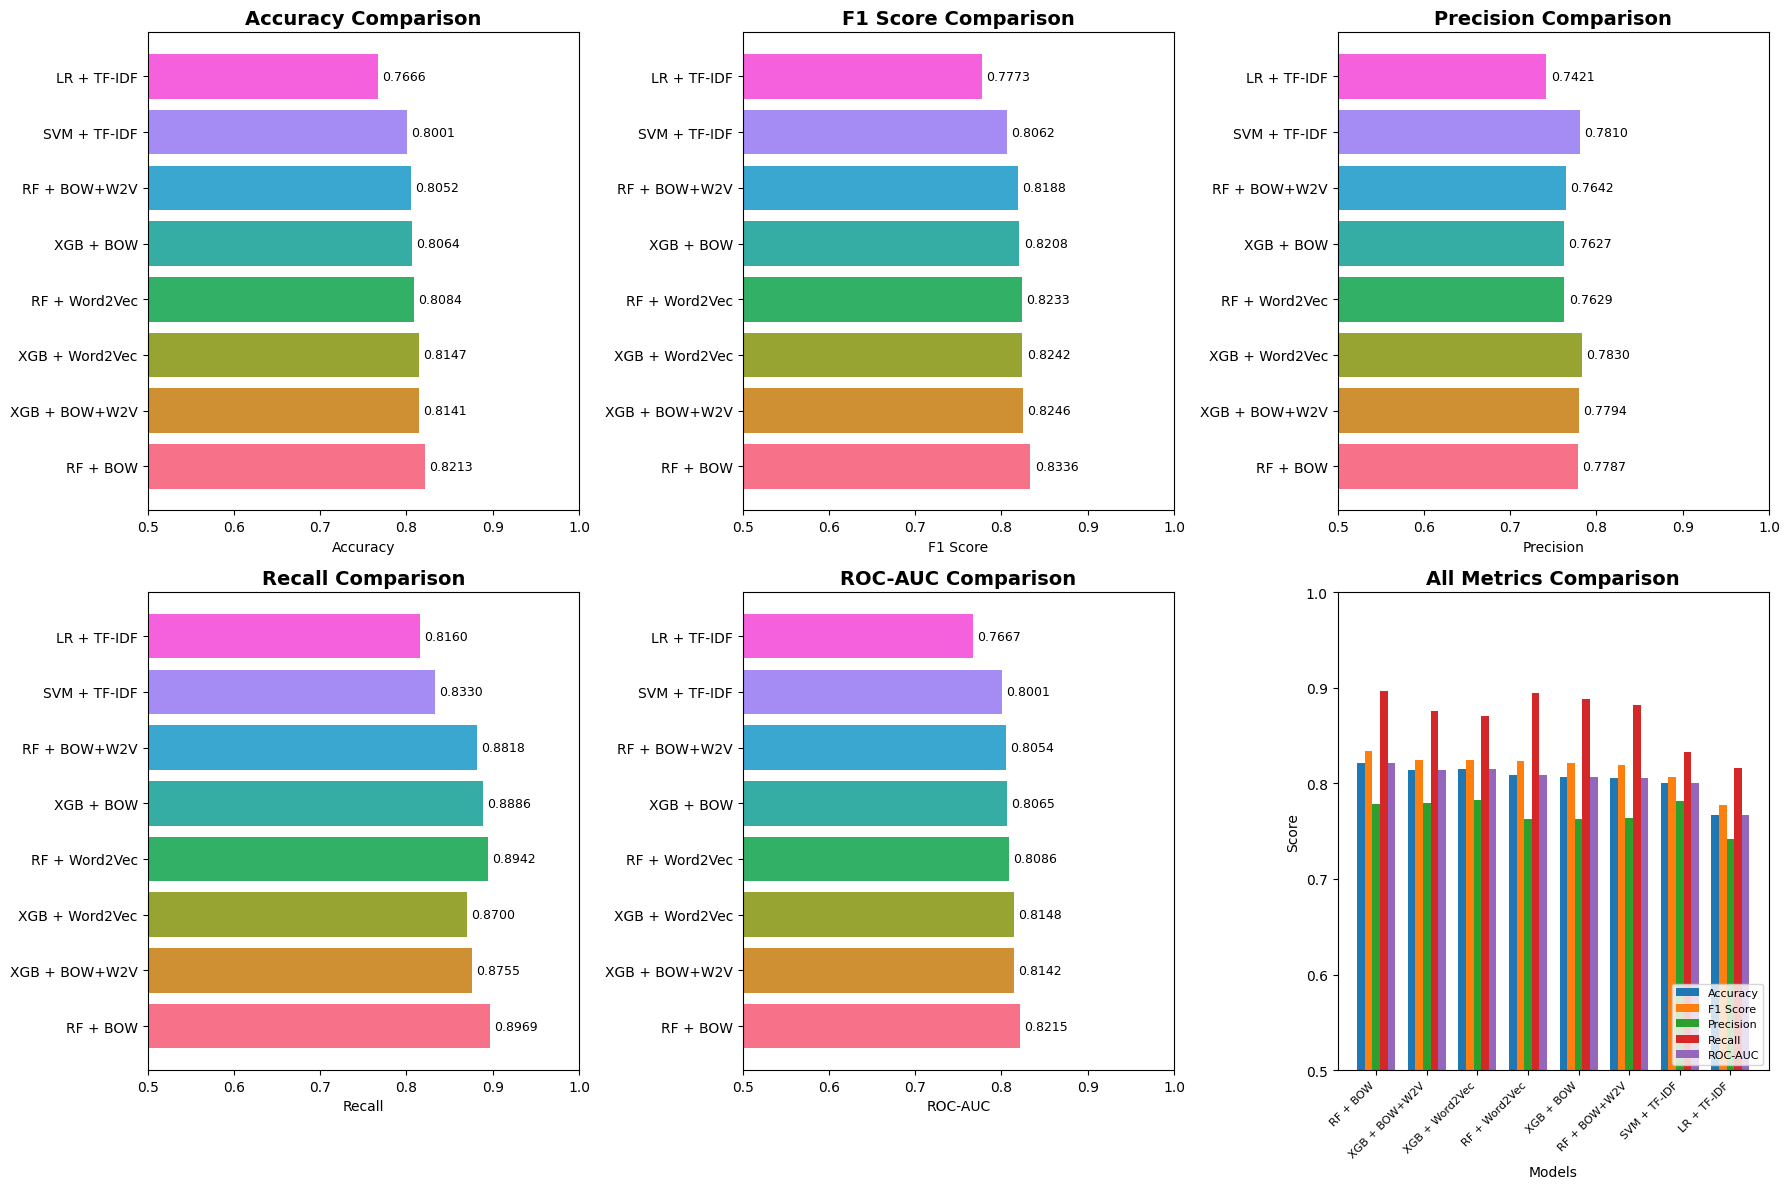


🏆 BEST MODEL: RF + BOW
   Accuracy:  0.8213
   F1 Score:  0.8336
   Precision: 0.7787
   Recall:    0.8969
   ROC-AUC:   0.8215


In [ ]:
# ============================================
# VISUALIZE METRICS COMPARISON - BAR PLOTS
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Set color palette
colors = sns.color_palette("husl", len(results_df))

# Accuracy comparison
ax1 = axes[0, 0]
bars = ax1.barh(results_df['Model'], results_df['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy')
ax1.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim(0.5, 1)
for i, bar in enumerate(bars):
    ax1.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{results_df["Accuracy"].iloc[i]:.4f}', va='center', fontsize=9)

# F1 Score comparison
ax2 = axes[0, 1]
bars = ax2.barh(results_df['Model'], results_df['F1 Score'], color=colors)
ax2.set_xlabel('F1 Score')
ax2.set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
ax2.set_xlim(0.5, 1)
for i, bar in enumerate(bars):
    ax2.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{results_df["F1 Score"].iloc[i]:.4f}', va='center', fontsize=9)

# Precision comparison
ax3 = axes[0, 2]
bars = ax3.barh(results_df['Model'], results_df['Precision'], color=colors)
ax3.set_xlabel('Precision')
ax3.set_title('Precision Comparison', fontsize=14, fontweight='bold')
ax3.set_xlim(0.5, 1)
for i, bar in enumerate(bars):
    ax3.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{results_df["Precision"].iloc[i]:.4f}', va='center', fontsize=9)

# Recall comparison
ax4 = axes[1, 0]
bars = ax4.barh(results_df['Model'], results_df['Recall'], color=colors)
ax4.set_xlabel('Recall')
ax4.set_title('Recall Comparison', fontsize=14, fontweight='bold')
ax4.set_xlim(0.5, 1)
for i, bar in enumerate(bars):
    ax4.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{results_df["Recall"].iloc[i]:.4f}', va='center', fontsize=9)

# ROC-AUC comparison
ax5 = axes[1, 1]
bars = ax5.barh(results_df['Model'], results_df['ROC-AUC'], color=colors)
ax5.set_xlabel('ROC-AUC')
ax5.set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
ax5.set_xlim(0.5, 1)
for i, bar in enumerate(bars):
    ax5.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{results_df["ROC-AUC"].iloc[i]:.4f}', va='center', fontsize=9)

# Overall comparison (grouped bar chart)
ax6 = axes[1, 2]
x = np.arange(len(results_df))
width = 0.15
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
for i, metric in enumerate(metrics):
    ax6.bar(x + i*width, results_df[metric], width, label=metric)
ax6.set_xlabel('Models')
ax6.set_ylabel('Score')
ax6.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
ax6.set_xticks(x + width*2)
ax6.set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=8)
ax6.legend(loc='lower right', fontsize=8)
ax6.set_ylim(0.5, 1)

plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

# Print best model
best_model = results_df.iloc[0]
print("\n" + "=" * 60)
print(f"🏆 BEST MODEL: {best_model['Model']}")
print("=" * 60)
print(f"   Accuracy:  {best_model['Accuracy']:.4f}")
print(f"   F1 Score:  {best_model['F1 Score']:.4f}")
print(f"   Precision: {best_model['Precision']:.4f}")
print(f"   Recall:    {best_model['Recall']:.4f}")
print(f"   ROC-AUC:   {best_model['ROC-AUC']:.4f}")

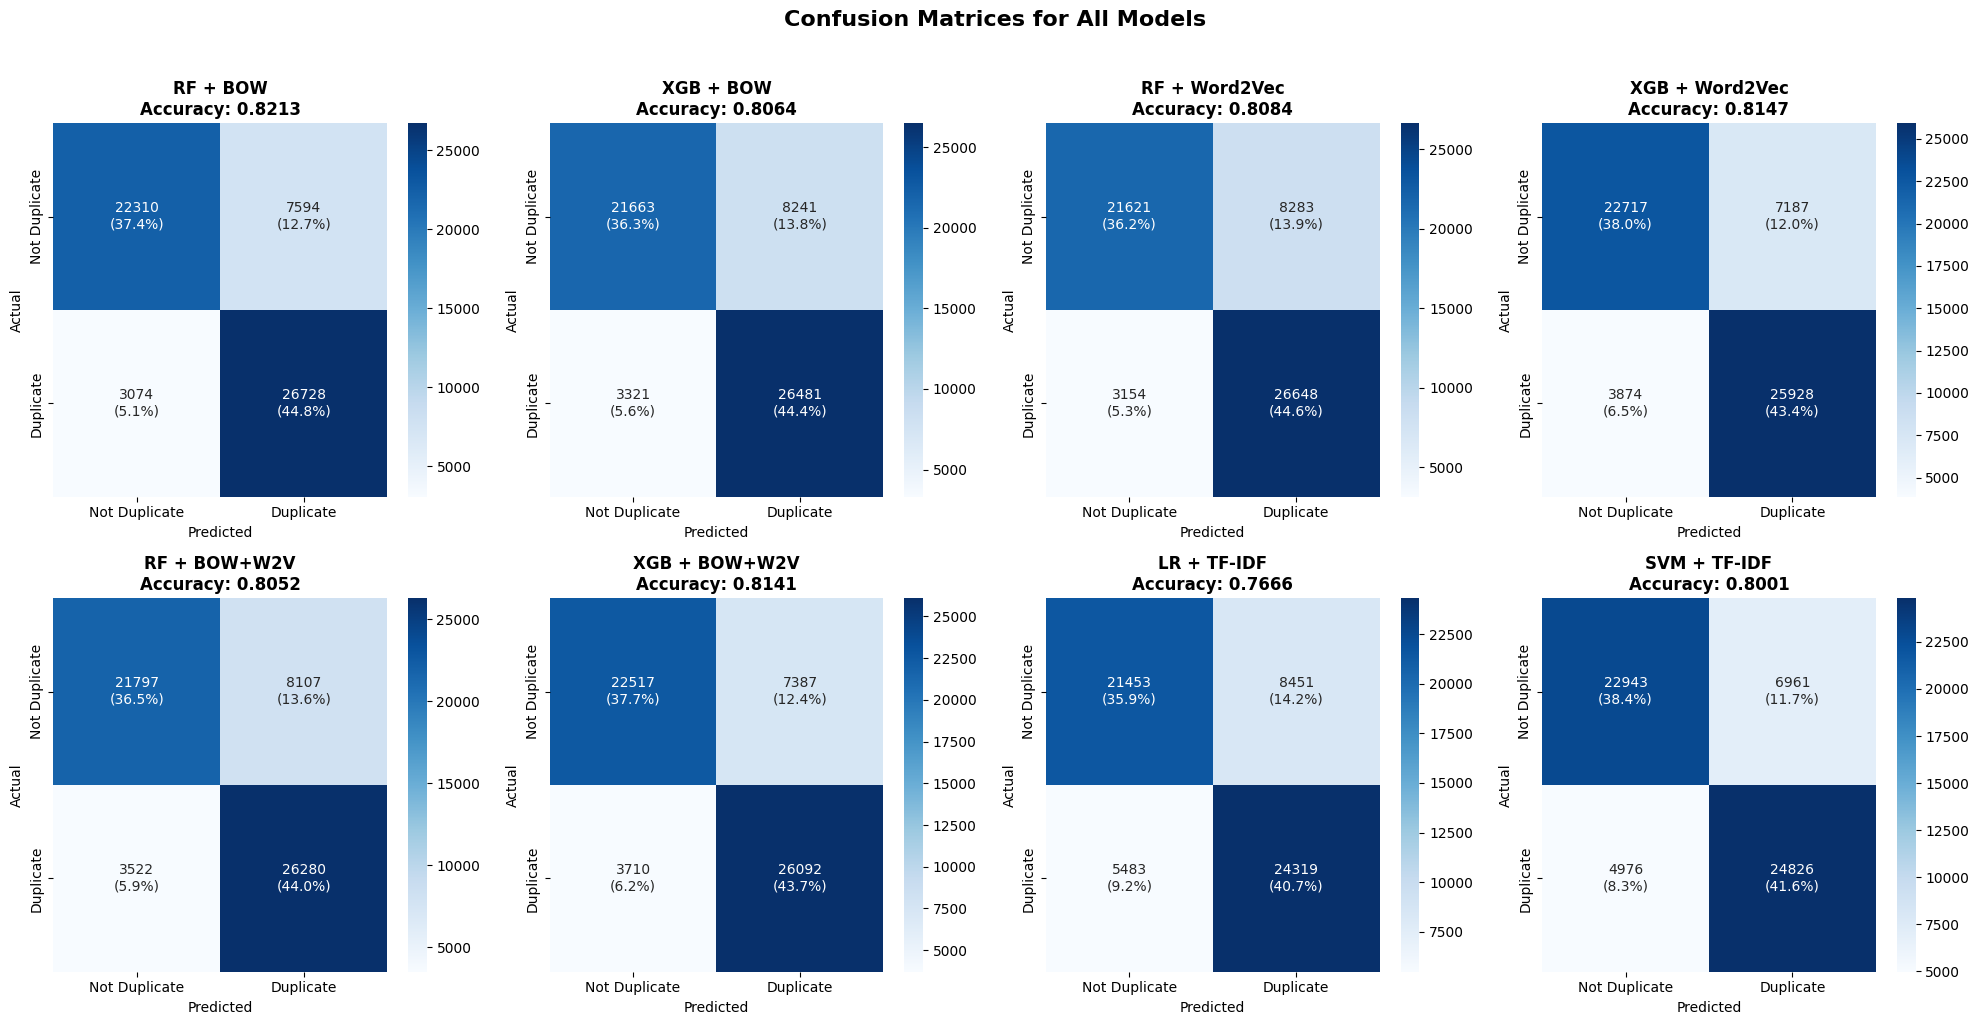

In [ ]:
# ============================================
# CONFUSION MATRICES FOR ALL MODELS
# ============================================
n_models = len(predictions_dict)
n_cols = 4
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, (name, data) in enumerate(predictions_dict.items()):
    cm = confusion_matrix(data['y_test'], data['y_pred'])
    
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum() * 100
    
    # Create annotations with both count and percentage
    annotations = np.array([[f'{val}\n({pct:.1f}%)' for val, pct in zip(row, pct_row)] 
                           for row, pct_row in zip(cm, cm_percent)])
    
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Duplicate', 'Duplicate'],
                yticklabels=['Not Duplicate', 'Duplicate'],
                cbar=True)
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(data["y_test"], data["y_pred"]):.4f}', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide any extra subplots
for idx in range(n_models, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrices_all_models.png', dpi=150, bbox_inches='tight')
plt.show()

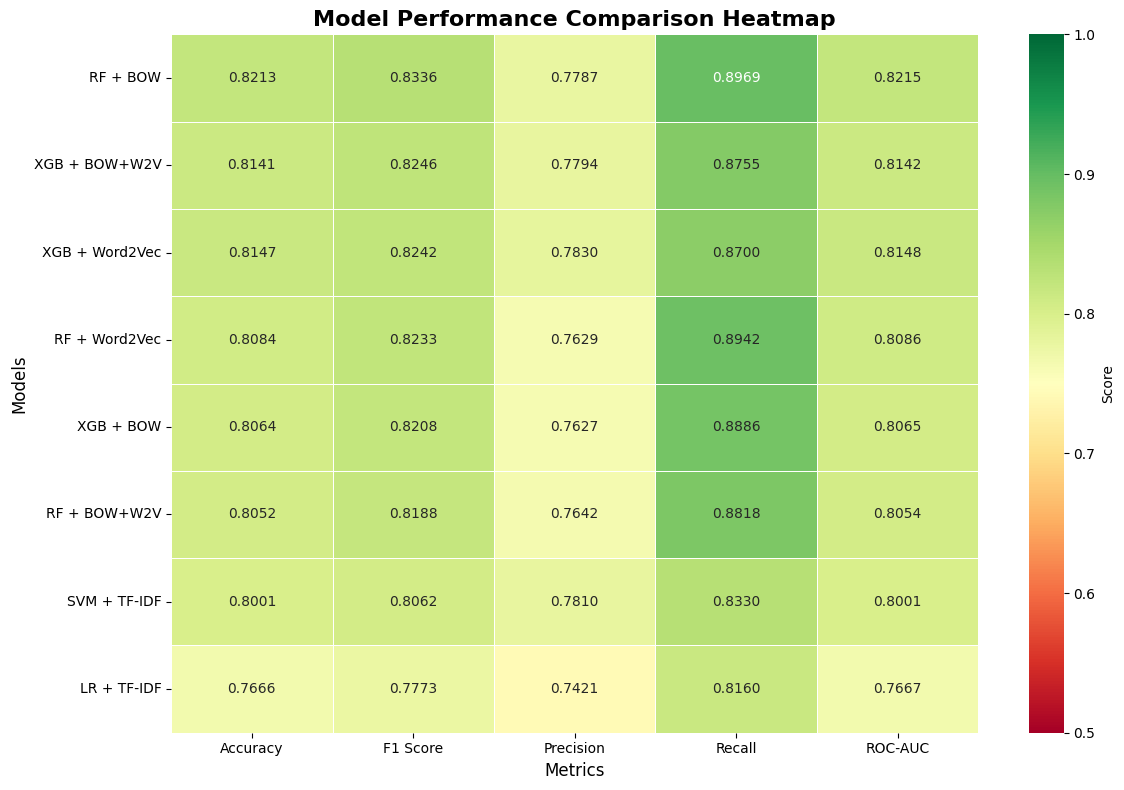


                         SUMMARY STATISTICS

Best Accuracy:  RF + BOW (0.8213)
Best F1 Score:  RF + BOW (0.8336)
Best Precision: XGB + Word2Vec (0.7830)
Best Recall:    RF + BOW (0.8969)
Best ROC-AUC:   RF + BOW (0.8215)


In [ ]:
# ============================================
# HEATMAP - METRICS COMPARISON
# ============================================
plt.figure(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = results_df.set_index('Model')[['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']]

# Create heatmap
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.4f', 
            linewidths=0.5, vmin=0.5, vmax=1.0, cbar_kws={'label': 'Score'})
plt.title('Model Performance Comparison Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.tight_layout()
plt.savefig('model_comparison_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n" + "=" * 80)
print("                         SUMMARY STATISTICS")
print("=" * 80)
print(f"\nBest Accuracy:  {results_df['Model'].iloc[results_df['Accuracy'].idxmax()]} ({results_df['Accuracy'].max():.4f})")
print(f"Best F1 Score:  {results_df['Model'].iloc[results_df['F1 Score'].idxmax()]} ({results_df['F1 Score'].max():.4f})")
print(f"Best Precision: {results_df['Model'].iloc[results_df['Precision'].idxmax()]} ({results_df['Precision'].max():.4f})")
print(f"Best Recall:    {results_df['Model'].iloc[results_df['Recall'].idxmax()]} ({results_df['Recall'].max():.4f})")
print(f"Best ROC-AUC:   {results_df['Model'].iloc[results_df['ROC-AUC'].idxmax()]} ({results_df['ROC-AUC'].max():.4f})")